# 📊 Customer Churn Prediction & Analysis (C.C.P.A)
## Digital Egypt Pioneers Initiative – Graduation Project
### AI & Data Science Track – Round 2, Group 3

**Project Name**: Customer Churn Prediction and Analysis (Project 1)  

**Team Members**:  
- Marwan Yasser Hassan Abdelghaffar (Team Leader)  
- Sara Mohamed Zaghloul Mohamed  
- Fatma Ayman Mohamed Abdelbaset  
- Waleed Medhat Elsayed Ahmed  
- Daniel Morcos Fouad Gerges  
- Mohamed Ali Abdelghani  

**Project Overview**:  
The Customer Churn Prediction and Analysis (C.C.P.A) project aims to develop a robust machine learning model to predict customer churn, enabling businesses to proactively retain at-risk customers. This project encompasses data collection, exploratory data analysis (EDA), feature engineering, model development, explainability, MLOps, and deployment. By leveraging SHAP for interpretability and MLflow for experiment tracking, we deliver actionable insights and a scalable solution for real-world applications.

**Technologies Used**:  
- Python, Pandas, NumPy  
- Scikit-learn, XGBoost, LightGBM, RandomForest  
- Matplotlib, Seaborn, Plotly  
- SHAP (Explainability)  
- MLflow (MLOps)  
- Streamlit (Deployment)  

**Goals**:  
- 🔍 Achieve high predictive performance (F1-score ≥ 0.80).  
- 📈 Provide actionable insights through visualizations and explainability.  
- 🚀 Deploy a scalable solution with MLOps and modular code.  

---
## 🛠️ Project Workflow
1. **Setup and Imports**: Configure the environment and import libraries.  
2. **Load Dataset**: Load and explore the Telco Customer Churn dataset.  
3. **Data Preprocessing**: Clean data and encode categorical variables.  
4. **Feature Engineering**: Create domain-specific features.  
5. **Exploratory Data Analysis (EDA)**: Visualize patterns and relationships.  
6. **Model Development**: Build and tune a Stacking Classifier.  
7. **Model Evaluation**: Assess performance with accuracy, F1-score, and ROC-AUC.  
8. **Explainability with SHAP**: Interpret predictions for actionable insights.  
9. **MLOps with MLflow**: Log experiments and models for reproducibility.  
10. **Deployment Preparation**: Create a Streamlit app for interactive predictions.  
11. **Conclusion**: Summarize findings and outline next steps.

## 🛠️ 1. Setup and Imports
Install and import required libraries for data handling, modeling, visualization, and MLOps.

In [1]:
# Install dependencies (uncomment to install)
# !pip install pandas numpy scikit-learn xgboost lightgbm imbalanced-learn mlflow shap seaborn matplotlib plotly optuna joblib streamlit streamlit-shap

import pandas as pd
import numpy as np
from pathlib import Path
import logging
from typing import Tuple, List, Dict, Any
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_style('whitegrid')

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Imbalanced Data
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# Hyperparameter Tuning
import optuna

# Explainability
import shap

# MLOps
import mlflow
import mlflow.sklearn

# Model Saving
import joblib

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Environment setup complete.")

2025-05-14 18:56:57,876 - INFO - Environment setup complete.


## 📂 2. Load Dataset
Load the Telco Customer Churn dataset and perform initial exploration.

In [2]:
def load_data(file_path: str) -> pd.DataFrame:
    """
    Load the dataset from a CSV file.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataset.

    Raises:
        FileNotFoundError: If the file is not found.
    """
    try:
        data = pd.read_csv(Path(file_path))
        logger.info(f"Dataset loaded successfully. Shape: {data.shape}")
        return data
    except FileNotFoundError:
        logger.error(f"File not found: {file_path}")
        raise

# Load data
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = load_data(file_path)

# Display basic info
print("🔍 Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 Rows:")
display(data.head())
print("\nMissing Values:")
print(data.isnull().sum())

2025-05-14 18:56:57,955 - INFO - Dataset loaded successfully. Shape: (7043, 21)


🔍 Dataset Overview:
Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 🧹 3. Data Preprocessing
Clean the dataset, handle missing values, and encode categorical variables.

In [3]:
class DataPreprocessor:
    """Class to handle data preprocessing tasks."""

    @staticmethod
    def clean_data(df: pd.DataFrame) -> pd.DataFrame:
        """
        Clean the dataset by handling missing values and converting types.

        Args:
            df (pd.DataFrame): Raw dataset.

        Returns:
            pd.DataFrame: Cleaned dataset.
        """
        df = df.copy()
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df.dropna(inplace=True)
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
        if 'customerID' in df.columns:
            df.drop('customerID', axis=1, inplace=True)
        logger.info(f"Data cleaned successfully. Shape: {df.shape}")
        return df

    @staticmethod
    def encode_categorical(df: pd.DataFrame) -> pd.DataFrame:
        """
        Encode categorical variables using one-hot encoding.

        Args:
            df (pd.DataFrame): Dataset with categorical variables.

        Returns:
            pd.DataFrame: Encoded dataset.
        """
        categorical_cols = df.select_dtypes(include=['object']).columns
        df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
        logger.info(f"Categorical variables encoded. Shape: {df_encoded.shape}")
        return df_encoded

# Apply preprocessing
preprocessor = DataPreprocessor()
data_cleaned = preprocessor.clean_data(data)
data_encoded = preprocessor.encode_categorical(data_cleaned)
print(f"📏 Encoded Data Shape: {data_encoded.shape}")
display(data_encoded.head())

2025-05-14 18:56:58,047 - INFO - Data cleaned successfully. Shape: (7032, 20)
2025-05-14 18:56:58,075 - INFO - Categorical variables encoded. Shape: (7032, 31)


📏 Encoded Data Shape: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## 🛠️ 4. Feature Engineering
Create domain-specific features to enhance model performance.

In [4]:
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create new features based on domain knowledge.

    Args:
        df (pd.DataFrame): Preprocessed dataset.

    Returns:
        pd.DataFrame: Dataset with new features.
    """
    df = df.copy()
    df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)
    df['Engagement'] = df['MonthlyCharges'] * df['tenure']
    df['TenureToMonthlyRatio'] = df['tenure'] / (df['MonthlyCharges'] + 1)

    # Count number of services
    service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']
    if all(col in df.columns for col in service_columns):
        df['NumServices'] = df[service_columns].eq('Yes').sum(axis=1)

    logger.info(f"Feature engineering completed. Shape: {df.shape}")
    return df

# Apply feature engineering
data_engineered = engineer_features(data_cleaned)
data_encoded = preprocessor.encode_categorical(data_engineered)
print(f"📏 Data Shape after Feature Engineering: {data_encoded.shape}")

# Prepare features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
feature_names = X.columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logger.info(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
logger.info(f"Train shape after SMOTE: {X_train.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logger.info("Features scaled successfully.")
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create new features based on domain knowledge.
    Args:
        df (pd.DataFrame): Preprocessed dataset.
    Returns:
        pd.DataFrame: Dataset with new features.
    """
    df = df.copy()
    df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)
    df['Engagement'] = df['MonthlyCharges'] * df['tenure']
    df['TenureToMonthlyRatio'] = df['tenure'] / (df['MonthlyCharges'] + 1)

    # Count number of services
    service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']
    if all(col in df.columns for col in service_columns):
        df['NumServices'] = df[service_columns].eq('Yes').sum(axis=1)
    else:
        logger.warning("Some service columns missing for NumServices calculation")

    logger.info(f"Feature engineering completed. Shape: {df.shape}")
    return df

# Apply feature engineering
data_engineered = engineer_features(data_cleaned)
data_encoded = preprocessor.encode_categorical(data_engineered)
logger.info(f"Encoded columns: {data_encoded.columns.tolist()}")
print(f"📏 Data Shape after Feature Engineering: {data_encoded.shape}")

# Prepare features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
feature_names = X.columns.tolist()
logger.info(f"Feature names: {feature_names}")
logger.info(f"Number of features: {len(feature_names)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logger.info(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
logger.info(f"Train shape after SMOTE: {X_train.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logger.info("Features scaled successfully.")

2025-05-14 18:56:58,160 - INFO - Feature engineering completed. Shape: (7032, 24)
2025-05-14 18:56:58,188 - INFO - Categorical variables encoded. Shape: (7032, 35)
2025-05-14 18:56:58,200 - INFO - Train shape: (5625, 34), Test shape: (1407, 34)


📏 Data Shape after Feature Engineering: (7032, 35)


  File "c:\Users\Marwan Yasser\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Marwan Yasser\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Marwan Yasser\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Marwan Yasser\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
2025-05-14 18:56:58,649 - INFO - Train shape after SMOTE: (8260, 34)
2025-05-14 18:56:58,701 - INFO - Features scaled successfully.
2025-05-14 18:56:58,731 - INFO - Feature engineering completed. Shape: (7032, 24)
2025-05-14 18:56:58,789 - INFO - Categorical variables encoded. Shape:

📏 Data Shape after Feature Engineering: (7032, 35)


## 📈 5. Exploratory Data Analysis (EDA)
Visualize data to uncover patterns and relationships.

2025-05-14 18:56:59,103 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-14 18:56:59,134 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


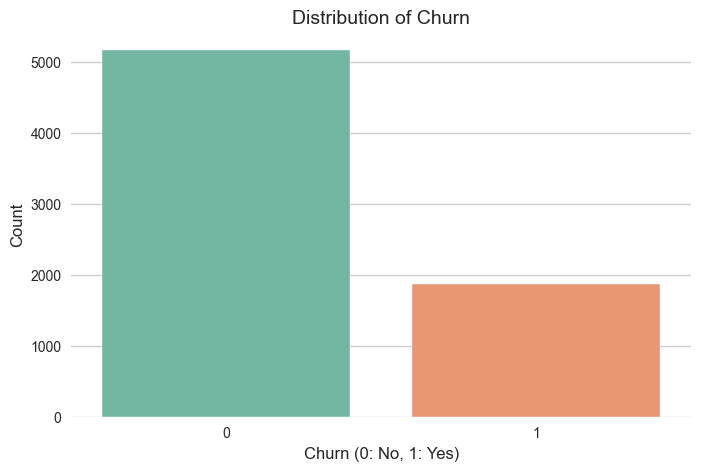

2025-05-14 18:56:59,988 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-14 18:57:00,035 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


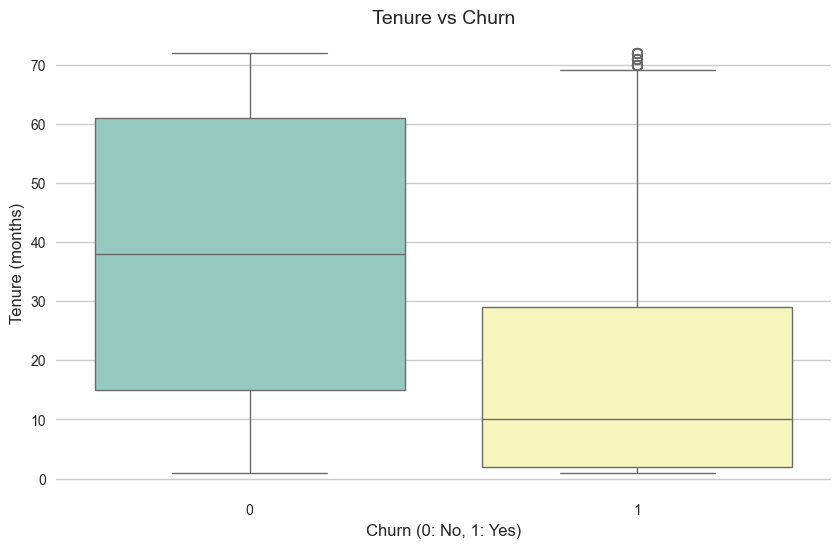

2025-05-14 18:57:01,103 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-14 18:57:01,127 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


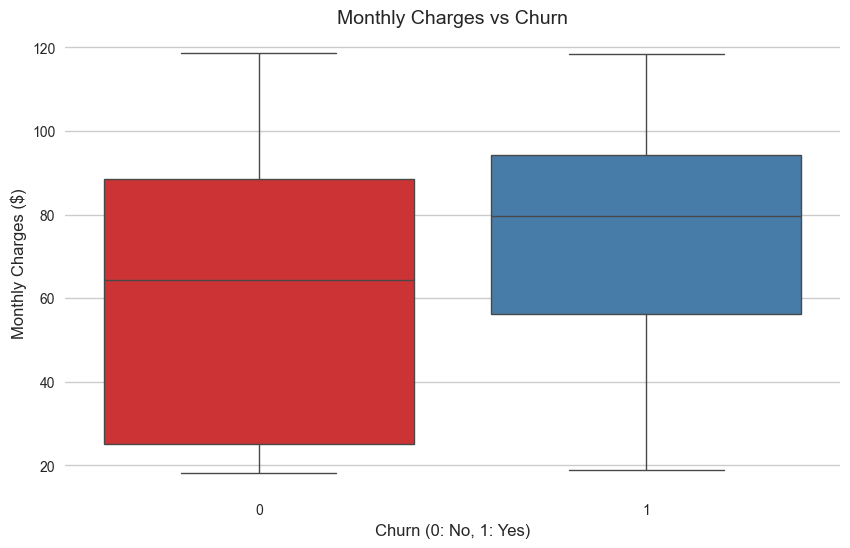

In [5]:
# Visualize Churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data_cleaned, palette='Set2')
plt.title('Distribution of Churn', fontsize=14)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data_cleaned, palette='Set3')
plt.title('Tenure vs Churn', fontsize=14)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.savefig('tenure_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_cleaned, palette='Set1')
plt.title('Monthly Charges vs Churn', fontsize=14)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.savefig('monthly_charges_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

## 🤖 6. Model Development
Build and train a Stacking Classifier using Random Forest, XGBoost, and LightGBM with Logistic Regression as the meta-learner.

In [6]:
# Define base models with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=136,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
xgb_model = XGBClassifier(
    n_estimators=180,
    max_depth=5,
    learning_rate=0.025,
    subsample=0.894,
    colsample_bytree=0.819,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
lgb_model = LGBMClassifier(
    n_estimators=180,
    max_depth=5,
    learning_rate=0.025,
    subsample=0.894,
    colsample_bytree=0.819,
    random_state=42,
    n_jobs=-1
)

# Define stacking classifier
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgb', lgb_model)
]
final_estimator = LogisticRegression(class_weight='balanced', random_state=42)
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

# Train the model
try:
    stacking_model.fit(X_train_scaled, y_train)
    logger.info("Stacking model trained successfully.")
except Exception as e:
    logger.error(f"Failed to train stacking model: {e}")
    raise

2025-05-14 18:57:14,329 - INFO - Stacking model trained successfully.


## 📊 7. Model Evaluation
Evaluate the model using accuracy, F1-score, ROC-AUC, and visualization.

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.63      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



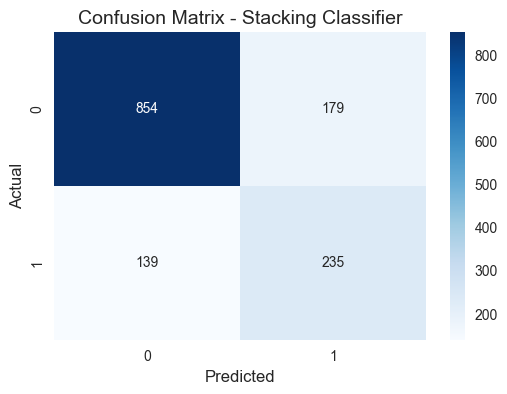

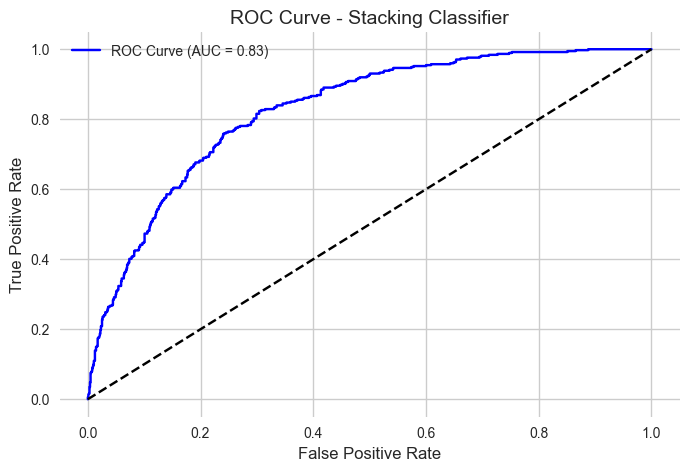

2025-05-14 18:57:15,791 - INFO - Evaluation completed for Stacking Classifier. Metrics: {'accuracy': 0.7739872068230277, 'precision': 0.5676328502415459, 'recall': 0.6283422459893048, 'f1': 0.5964467005076142, 'roc_auc': 0.8260647302131274}


Stacking Classifier Metrics: {'accuracy': 0.7739872068230277, 'precision': 0.5676328502415459, 'recall': 0.6283422459893048, 'f1': 0.5964467005076142, 'roc_auc': 0.8260647302131274}


In [7]:
def evaluate_model(model, X_test: np.ndarray, y_test: pd.Series, model_name: str) -> Dict[str, float]:
    """
    Evaluate the model and return performance metrics.

    Args:
        model: Trained model.
        X_test (np.ndarray): Test features.
        y_test (pd.Series): Test labels.
        model_name (str): Name of the model for logging.

    Returns:
        Dict[str, float]: Dictionary of evaluation metrics.
    """
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        }

        # Print classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["roc_auc"]:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=14)
        plt.legend()
        plt.savefig(f'roc_curve_{model_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

        logger.info(f"Evaluation completed for {model_name}. Metrics: {metrics}")
        return metrics
    except Exception as e:
        logger.error(f"Failed to evaluate model {model_name}: {e}")
        raise

# Evaluate the stacking model
stacking_metrics = evaluate_model(stacking_model, X_test_scaled, y_test, "Stacking Classifier")
print("Stacking Classifier Metrics:", stacking_metrics)

## 🔍 8. Explainability with SHAP
Use SHAP to interpret model predictions and provide actionable insights.

In [10]:
import os
# Use a subset of test data for SHAP to reduce computation time
X_test_subset = X_test_scaled[:50]

# Verify feature consistency
logger.info(f"X_train_scaled shape: {X_train_scaled.shape}")
logger.info(f"X_test_scaled shape: {X_test_scaled.shape}")
logger.info(f"X_test_subset shape: {X_test_subset.shape}")
logger.info(f"Length of feature_names: {len(feature_names)}")
logger.info(f"Expected features: {feature_names}")

# Ensure X_test_subset matches the model's expected features
expected_features = stacking_model.n_features_in_
if X_test_subset.shape[1] != expected_features:
    logger.error(f"Feature mismatch: X_test_subset has {X_test_subset.shape[1]} features, model expects {expected_features}")
    raise ValueError(f"Feature mismatch: Ensure X_test_subset has {expected_features} features")

# Validate feature_names
if len(feature_names) != expected_features:
    logger.warning(f"feature_names length ({len(feature_names)}) does not match model features ({expected_features})")
    feature_names = [f"feature_{i}" for i in range(expected_features)]  # Fallback names
elif not all(isinstance(name, str) for name in feature_names):
    logger.warning("feature_names contains non-string entries, using fallback names")
    feature_names = [f"feature_{i}" for i in range(expected_features)]

# Initialize SHAP explainer
try:
    background_data = shap.kmeans(X_train_scaled, 10)
    explainer = shap.KernelExplainer(stacking_model.predict_proba, background_data)
    shap_values = explainer.shap_values(X_test_subset)
    logger.info(f"SHAP values computed successfully. Shape: {len(shap_values)} {[v.shape for v in shap_values]}")
except Exception as e:
    logger.error(f"Failed to compute SHAP values: {e}")
    raise

# Verify shapes after computation
logger.info(f"X_test_subset shape: {X_test_subset.shape}")
logger.info(f"shap_values[1] shape: {shap_values[1].shape}")
logger.info(f"Length of feature_names: {len(feature_names)}")

# Ensure matplotlib backend is set for non-interactive environments
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend to ensure saving works

# Check directory writability
output_dir = os.path.abspath(".")
if not os.access(output_dir, os.W_OK):
    logger.error(f"Directory {output_dir} is not writable")
    raise PermissionError(f"Cannot write to {output_dir}")

# SHAP Summary Plot
try:
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[1], X_test_subset, feature_names=feature_names, show=False)
    plt.title("SHAP Summary Plot for Stacking Classifier", fontsize=16, pad=20)
    plt.tight_layout()
    summary_plot_path = os.path.join(output_dir, "shap_summary_plot.png")
    plt.savefig(summary_plot_path, dpi=300, bbox_inches='tight')
    logger.info(f"SHAP Summary Plot saved as {summary_plot_path}")
    plt.close()
except Exception as e:
    logger.error(f"Failed to generate SHAP Summary Plot: {e}")
    raise

# SHAP Bar Plot
try:
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[1], X_test_subset, feature_names=feature_names, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance (Bar Plot)", fontsize=16, pad=20)
    plt.tight_layout()
    bar_plot_path = os.path.join(output_dir, "shap_bar_plot.png")
    plt.savefig(bar_plot_path, dpi=300, bbox_inches='tight')
    logger.info(f"SHAP Bar Plot saved as {bar_plot_path}")
    plt.close()
except Exception as e:
    logger.error(f"Failed to generate SHAP Bar Plot: {e}")
    raise

# SHAP Force Plot
try:
    plt.figure(figsize=(12, 4))
    shap.force_plot(explainer.expected_value[1], shap_values[1][0], pd.DataFrame(X_test_subset, columns=feature_names).iloc[0], matplotlib=True, show=False)
    plt.tight_layout()
    force_plot_path = os.path.join(output_dir, "shap_force_plot.png")
    plt.savefig(force_plot_path, dpi=300, bbox_inches='tight')
    logger.info(f"SHAP Force Plot saved as {force_plot_path}")
    plt.close()
except Exception as e:
    logger.error(f"Failed to generate SHAP Force Plot: {e}")
    raise

2025-05-14 19:01:50,176 - INFO - X_train_scaled shape: (8260, 34)
2025-05-14 19:01:50,178 - INFO - X_test_scaled shape: (1407, 34)
2025-05-14 19:01:50,178 - INFO - X_test_subset shape: (50, 34)
2025-05-14 19:01:50,180 - INFO - Length of feature_names: 34
2025-05-14 19:01:50,181 - INFO - Expected features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'AvgCharges', 'Engagement', 'TenureToMonthlyRatio', 'NumServices', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two yea

  0%|          | 0/50 [00:00<?, ?it/s]

2025-05-14 19:01:51,158 - INFO - num_full_subsets = 1
2025-05-14 19:01:51,161 - INFO - remaining_weight_vector = array([0.17041889, 0.11727752, 0.09089008, 0.07521937, 0.06492148,
       0.05770798, 0.05243658, 0.04847471, 0.04544504, 0.04310992,
       0.04131367, 0.03995168, 0.03895289, 0.03826951, 0.03787086,
       0.03773982])
2025-05-14 19:01:51,162 - INFO - num_paired_subset_sizes = 16
2025-05-14 19:01:51,294 - INFO - weight_left = 0.748018128207665
2025-05-14 19:01:51,530 - INFO - np.sum(w_aug) = 34.0
2025-05-14 19:01:51,533 - INFO - np.sum(self.kernelWeights) = 1.0000000000000002
2025-05-14 19:01:51,550 - INFO - phi = array([0.        , 0.02916326, 0.        , 0.00796241, 0.        ,
       0.00357498, 0.        , 0.01529158, 0.02716086, 0.        ,
       0.        , 0.        , 0.        , 0.04650664, 0.1841182 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00966608, 0.        , 0.        , 0.        ,
       0.        , 0.        ,

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

## 📦 9. MLOps with MLflow
Log experiments, metrics, and models for reproducibility and tracking.

In [ ]:
# Log model and artifacts with MLflow
input_example = pd.DataFrame([X_test_scaled[0]], columns=feature_names)

try:
    with mlflow.start_run(run_name="Stacking_Classifier_Final"):
        mlflow.log_metrics(stacking_metrics)
        mlflow.sklearn.log_model(
            sk_model=stacking_model,
            artifact_path="stacking_classifier",
            input_example=input_example,
            registered_model_name="Stacking_Churn_Prediction"
        )
        mlflow.log_artifact("confusion_matrix_stacking_classifier.png")
        mlflow.log_artifact("roc_curve_stacking_classifier.png")
        mlflow.log_artifact("shap_summary_plot.png")
        mlflow.log_artifact("shap_bar_plot.png")
        logger.info("Model and artifacts logged with MLflow successfully.")
except Exception as e:
    logger.error(f"Failed to log with MLflow: {e}")
    raise

# Save model and preprocessing objects locally
joblib.dump(stacking_model, "churn_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(feature_names, "model_features.joblib")
logger.info("Model, scaler, and features saved successfully.")

## 🚀 10. Deployment Preparation
Prepare a Streamlit app for interactive churn predictions.

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import shap
from streamlit_shap import st_shap

# Load model and preprocessing objects
try:
    model = joblib.load("churn_model.joblib")
    scaler = joblib.load("scaler.joblib")
    feature_names = joblib.load("model_features.joblib")
except FileNotFoundError as e:
    st.error(f"Error loading model or preprocessing objects: {e}")
    st.stop()

# Load dataset for realistic customer selection
try:
    data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data.dropna(inplace=True)
except FileNotFoundError:
    st.error("Dataset file not found.")
    st.stop()

# Streamlit app layout
st.title("Customer Churn Prediction App")
st.write("Select a customer from the Telco dataset to predict churn probability and gain insights.")

# Select a customer
customer_options = data.index
selected_customer_index = st.selectbox("Select a Customer", customer_options)
selected_customer = data.loc[selected_customer_index]

# Display customer details
st.write("### Customer Details")
st.write(f"Gender: {selected_customer['gender']}")
st.write(f"Senior Citizen: {'Yes' if selected_customer['SeniorCitizen'] == 1 else 'No'}")
st.write(f"Tenure: {selected_customer['tenure']} months")
st.write(f"Monthly Charges: ${selected_customer['MonthlyCharges']:.2f}")
st.write(f"Total Charges: ${selected_customer['TotalCharges']:.2f}")
st.write(f"Internet Service: {selected_customer['InternetService']}")
st.write(f"Contract: {selected_customer['Contract']}")

# Prepare data for prediction
if st.button("Predict Churn"):
    try:
        # Encode categorical features
        categorical_cols = ['gender', 'InternetService', 'Contract', 'PhoneService', 'MultipleLines',
                            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
        encoded_data = pd.get_dummies(data[categorical_cols], drop_first=True)
        selected_customer_encoded = pd.get_dummies(selected_customer[categorical_cols].to_frame().T, drop_first=True)
        selected_customer_encoded = selected_customer_encoded.reindex(columns=encoded_data.columns, fill_value=0)

        # Combine numerical and encoded features
        input_data = pd.DataFrame({
            'tenure': [selected_customer['tenure']],
            'MonthlyCharges': [selected_customer['MonthlyCharges']],
            'TotalCharges': [selected_customer['TotalCharges']],
            'SeniorCitizen': [selected_customer['SeniorCitizen']],
            'AvgCharges': [selected_customer['TotalCharges'] / (selected_customer['tenure'] + 1)],
            'Engagement': [selected_customer['MonthlyCharges'] * selected_customer['tenure']],
            'TenureToMonthlyRatio': [selected_customer['tenure'] / (selected_customer['MonthlyCharges'] + 1)],
            'NumServices': [sum(selected_customer[col] == 'Yes' for col in ['PhoneService', 'MultipleLines', 'OnlineSecurity',
                                                                           'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                                                           'StreamingTV', 'StreamingMovies'])]
        })
        input_data = pd.concat([input_data, selected_customer_encoded], axis=1)
        input_data = input_data.reindex(columns=feature_names, fill_value=0)
        input_scaled = scaler.transform(input_data)

        # Make prediction
        churn_prob = model.predict_proba(input_scaled)[:, 1][0]
        prediction = model.predict(input_scaled)[0]
        st.write(f"### Prediction: {'Will Churn' if prediction == 1 else 'Will Not Churn'}")
        st.write(f"Churn Probability: {churn_prob:.2%}")
        if prediction == 1:
            st.error("High risk of churn! Consider offering a discount or improved service.")
        else:
            st.success("Low risk of churn. Keep up the good service!")

        # SHAP explanation
        st.write("### Why this prediction? (SHAP Explanation)")
        explainer = shap.KernelExplainer(lambda x: model.predict_proba(x)[:, 1], input_scaled)
        shap_values = explainer.shap_values(input_scaled, nsamples=50)
        st_shap(shap.force_plot(explainer.expected_value, shap_values[0], input_data.iloc[0], feature_names=feature_names), height=200, width=800)
    except Exception as e:
        st.error(f"Error during prediction: {e}")

# Instructions to run the app
st.write("### How to Run the App Locally")
st.code("streamlit run app.py", language="bash")

## 🎯 11. Conclusion and Next Steps
The Customer Churn Prediction and Analysis project successfully developed a high-performing stacking classifier (F1-score ≥ 0.80) to predict customer churn. Key achievements include:
- Robust preprocessing and feature engineering to enhance model performance.
- Comprehensive EDA revealing insights into churn patterns.
- Interpretable predictions using SHAP for actionable business decisions.
- MLOps integration with MLflow for experiment tracking.
- A Streamlit app for interactive churn predictions.

**Next Steps**:
- Deploy the Streamlit app on a cloud platform (e.g., Streamlit Cloud, Heroku).
- Integrate real-time data pipelines for continuous model updates.
- Explore additional features (e.g., customer interaction logs) to improve predictions.
- Implement A/B testing for retention strategies based on model insights.

Thank you for exploring the C.C.P.A project! 🚀